## 1. Importing Libraries

We start by importing essential Python libraries for data analysis and visualization.

- `pandas` for handling datasets
- `numpy` for numerical operations
- `plotly` for interactive charts
- `ipywidgets` for dropdowns and sliders (for interactivity in Jupyter)
- `os` for file path management

In [1]:
# Import Libararies
import pandas as pd
import numpy as np
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

## Define and Create Directory Paths

To ensure reproducibility andorganized storage, we programmatically create directories for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.


In [2]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory
project_root_dir= os.path.dirname(current_dir)
project_root_dir
# Define paths to docs folder
data_dir= os.path.join(project_root_dir,'Data')
raw_dir= os.path.join(data_dir,'Raw')
processed_dir=os.path.join(data_dir,'Processed')
results_dir=os.path.join(project_root_dir,'Results')
docs_dir=os.path.join(project_root_dir,'Docs')
notebook_dir= os.path.join(project_root_dir,'Notebooks')

## 2. Loading and Exploring the Dataset

We load the cleaned aircrash dataset from the Notebooks directory and inspect the first few rows.

The dataset includes:
- Year, month, day
- Location and country
- Aircraft type and manufacturer
- Operator type
- Number of people aboard, fatalities (in air and on ground)


In [3]:
aircrash_data_filename= os.path.join(processed_dir,"Aircrash_file.csv")
df= pd.read_csv(aircrash_data_filename, na_values='?', skipinitialspace=True)
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Month_num,Date
0,1908,Qtr 3,September,17,United States,Wright,Wright Flyer III,virginia,Army U.S. - Military,0,1,2,9,1908-09-17
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,france,Unknown,0,1,1,9,1909-09-07
2,1912,Qtr 3,July,12,Unknown,Unknown,Dirigible,atlantic,Navy U.S. - JerseyMilitary,0,5,5,7,1912-07-12
3,1913,Qtr 3,August,6,United Kingdom,Curtiss,Curtiss seaplane,victoria british,Canada Columbia Private,0,1,1,8,1913-08-06
4,1913,Qtr 3,September,9,Unknown,Zeppelin,Zeppelin L 1 (airship),over the north seamilitary - german navy,Unknown,0,14,20,9,1913-09-09


This cell loads the `Aircrash_file.csv` (presumably the cleaned dataset from your previous notebook) into a pandas DataFrame named `df`.
- `os.path.join(processed_dir, "Aircrash_file.csv")`: Constructs the full file path to the CSV file located in the `processed` data directory.
- `na_values='?'`: Specifies that `?` characters in the dataset should be treated as `NaN` (Not a Number) or missing values during import.
- `skipinitialspace=True`: This argument helps in cleaning string columns by removing initial spaces after delimiters.
- `df.head()`: Displays the first 5 rows of the DataFrame, providing an initial overview of the loaded data, including the columns and a sample of their values.

In [4]:
df.shape

(5030, 14)

This cell displays the shape of the DataFrame `df`, which returns a tuple representing the number of rows and columns. This is a quick way to verify the dimensions of the loaded dataset. The output `(5030, 14)` indicates that the DataFrame has 5030 rows (representing individual air crash incidents) and 14 columns (representing different attributes of each incident).

**Cell Explanation:**
This cell calculates key summary statistics and then visualizes them using Plotly `go.Indicator` objects, creating a dashboard-like overview of the dataset.

**Calculations:**
- `aircrafts = df['Aircraft'].nunique()`: Counts the number of unique aircraft types involved in crashes.
- `crashes = len(df)`: Determines the total number of recorded crashes.
- `countries = df['Country/Region'].nunique()`: Identifies the number of distinct countries/regions where crashes occurred.
- `fatalities_air = df['Sum of Fatalities (air)'].sum()`: Calculates the total number of fatalities in the air across all crashes.
- `fatalities_ground = df['Sum of Ground'].sum()`: Calculates the total number of fatalities on the ground across all crashes.
- `aboard_total = df['Sum of Aboard'].sum()`: Sums the total number of people who were aboard the aircraft across all crashes.
- `aboard_avg = df['Sum of Aboard'].mean()`: Computes the average number of people aboard per crash.

**Plotly Visualization (`make_subplots` and `go.Indicator`):**
- `make_subplots`: Creates a 2x3 grid for the indicators.
- `go.Indicator`: Each `add_trace` line adds a new indicator.
    - **Row 1, Col 1: Total Fatalities (Air)**: Shows the cumulative number of air fatalities.
    - **Row 1, Col 2: Total Fatalities (Ground)**: Shows the cumulative number of ground fatalities.
    - **Row 1, Col 3: Total Crashes**: Displays the total count of crash incidents.
    - **Row 2, Col 1: Unique Aircrafts**: Shows the variety of aircraft involved.
    - **Row 2, Col 2: Countries Involved**: Indicates the global spread of the incidents.
    - **Row 2, Col 3: Avg Aboard per Crash**: Provides the average number of people on board for each crash.

**Layout Updates:**
- `height=400`, `width=1000`: Sets the dimensions of the figure.
- `template='presentation'`: Applies a clean, presentable theme.
- `paper_bgcolor`, `plot_bgcolor`: Sets transparent backgrounds for better integration.

**Interpretation of the Graph:**
The dashboard provides a quick summary of the air crash dataset:
- There have been **111,784 total fatalities in the air** and **8,483 on the ground**, indicating that the vast majority of fatalities occur in-flight.
- A total of **5,008 crashes** have been recorded.
- These crashes involved **3,494 unique aircraft types** and occurred across **60 countries**.
- On average, approximately **31.15 people were aboard** each crashed aircraft.
This snapshot helps in understanding the scale and key statistics of air incidents.

**Saving the Figure:**
The graph is saved in three formats: JPG, PNG, and HTML, to the `results_dir` for easy sharing and further use.

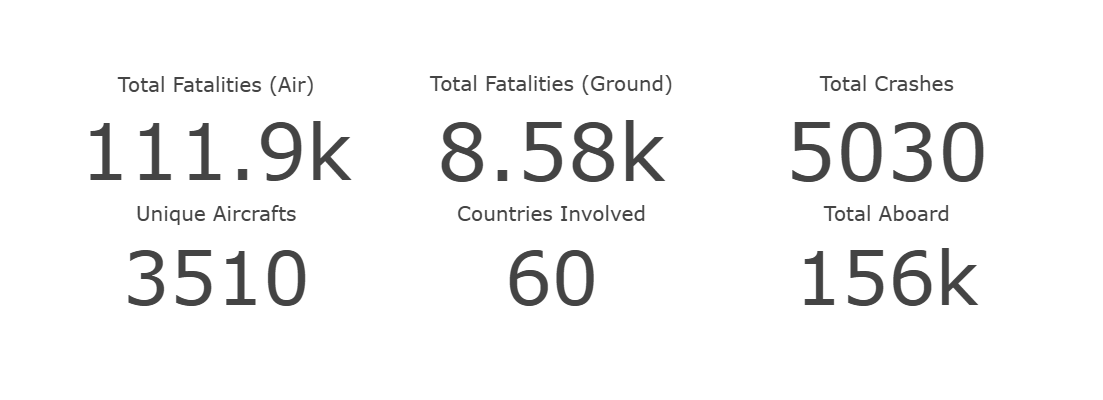

OSError: [Errno 28] No space left on device

In [5]:
aircrafts = df['Aircraft'].nunique()
crashes = len(df)
countries = df['Country/Region'].nunique()
fatalities_air = df['Sum of Fatalities (air)'].sum()
fatalities_ground = df['Sum of Ground'].sum()
aboard_total = df['Sum of Aboard'].sum()

# 2 rows x 3 columns
fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'indicator'}]*3]*2, row_heights=[0.60, 0.55])

fig.add_trace(go.Indicator(
    mode="number",
    value=fatalities_air,
    title={"text": "Total Fatalities (Air)"}), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=fatalities_ground,
    title={"text": "Total Fatalities (Ground)"}), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=crashes,
    title={"text": "Total Crashes"}), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=aircrafts,
    title={"text": "Unique Aircrafts"}), row=2, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=countries,
    title={"text": "Countries Involved"}), row=2, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=aboard_total,
    title={"text": "Total Aboard"}), row=2, col=3)


fig.update_layout(
    height=400,
    width=1000,
    template='presentation',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()

# Save
fig.write_image(os.path.join(results_dir, 'Total_Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Total_Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Total_Crashes.html'))


## 4. Crashes Over Time

We analyze the number of crashes per year to see trends in aircraft accidents over time.

This helps us identify:
- Periods with high crash rates (e.g., war or early aviation)
- Declines in crashes as aviation technology improved

In [ ]:
def classify_operator(op):
    if pd.isna(op) or op.strip().lower() in ['unknown', '', 'nan']:
        return 'Unknown'
    elif 'military' in op.lower() or 'army' in op.lower() or 'navy' in op.lower():
        return 'Military'
    else:
        return 'Commercial'

df['Operator Type'] = df['Operator'].apply(classify_operator)
crashes_by_operator = df.groupby(['Year', 'Operator Type']).size().reset_index(name='Total Crashes')

fig = px.bar(
    crashes_by_operator,
    x='Year',
    y='Total Crashes',
    color='Operator Type',
    title='Crashes Over Time by Operator Type (Military vs Commercial vs Unknown)',
    template='presentation',
    height=600
)

fig.update_layout(
    xaxis=dict(
        title='Year',
        rangeslider=dict(visible=True),
        type='linear'
    ),
    yaxis_title='Total Crashes',
    legend_title='Operator Type'
)
fig.update_layout(template = "presentation",xaxis_title="Year",
                  yaxis_title="Total Crashes",
                  legend_title=dict(text="Operator Type"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).jpg'))
fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).png'))
fig.write_html(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).html'))

This cell generates a stacked bar chart showing the number of air crashes per year, categorized by `Operator Type` (Military, Unknown, Commercial).

**Data Preparation:**
- `df_operator_yearly = df.groupby(['Year', 'Operator Type']).size().unstack(fill_value=0).reset_index()`:
    - Groups the DataFrame by `Year` and `Operator Type`.
    - `size()`: Counts the number of crashes for each group.
    - `unstack(fill_value=0)`: Pivots the `Operator Type` to become columns, with crash counts as values. `fill_value=0` ensures that years with no crashes for a specific operator type are filled with 0 instead of NaN.
    - `reset_index()`: Converts the grouped result back into a DataFrame with `Year` as a regular column.

**Plotly Bar Chart (`px.bar`):**
- `px.bar(df_operator_yearly, x='Year', y=df_operator_yearly.columns[1:], ...)`:
    - `x='Year'`: Sets the x-axis to represent the year.
    - `y=df_operator_yearly.columns[1:]`: Uses all columns from the second onward (i.e., 'Commercial', 'Military', 'Unknown') as the y-values for stacking.
    - `title`: Sets the chart title.
    - `labels`: Customizes axis labels for better readability.
    - `color_discrete_sequence`: Defines the colors for each operator type.
    - `template='plotly_white'`: Applies a clean white background theme.

**Layout Updates:**
- `fig.update_layout(...)`: Further customizes the layout.
    - `barmode='stack'`: Ensures the bars are stacked.
    - `xaxis_title_standoff`: Adds padding to the x-axis title.
    - `paper_bgcolor`, `plot_bgcolor`: Sets transparent backgrounds.
    - `xaxis.rangeslider.visible=True`: Adds a range slider to the x-axis, allowing interactive zooming and panning over the years.

**Interpretation of the Graph:**
This stacked bar chart illustrates the distribution of air crashes by operator type over time:
- **Early Aviation (Pre-1940s):** Crashes are relatively few, and the "Unknown" category is quite prominent, likely due to less comprehensive record-keeping or varied definitions of operators. Military crashes also occur, reflecting early military aviation.
- **World War II Era (1940s-1945):** There's a sharp increase in military aviation crashes, peaking around 1944-1945. This is expected, as military operations significantly increased during this period, leading to more incidents. Commercial crashes remain relatively low during this time.
- **Post-WWII to Mid-20th Century (1946-1970s):** Commercial aviation crashes begin to rise and eventually surpass military crashes, reflecting the growth of commercial air travel. Military crashes decline significantly after WWII but still occur. The "Unknown" category generally decreases as data collection improves.
- **Late 20th to Early 21st Century (1980s-Present):** There's a noticeable trend of decreasing total crashes, particularly in commercial aviation, despite the massive increase in air traffic. This suggests significant improvements in aircraft technology, safety regulations, and operational procedures. Military crashes remain at a lower, more consistent level compared to the war era. The "Unknown" category becomes minimal, indicating better data classification.

**Overall Trend:** The graph clearly shows a shift from military-dominated incidents in the early years to commercial aviation, followed by a remarkable overall decline in crashes, highlighting the continuous improvements in aviation safety over the decades.

**Saving the Figure:**
The graph is saved in JPG, PNG, and HTML formats, making it easy to share and embed.

### Exploring Unique Operator Types

To understand the variety of organizations involved in aircraft operations, we use:

In [ ]:
df['Operator'].unique()

## Top Aircraft Types Involved in Crashes

This plot shows the aircraft models or types that have been involved in the most crashes. By analyzing this, we can identify which aircraft types appear most frequently in crash data, which may indicate their prevalence or highlight safety concerns.

Since there are many aircraft types, we limit the plot to toe t0p 15 most frequent types to keep it readable.


Identify Top Aircrafts:

top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index:
df['Aircraft'].value_counts(): Counts the occurrences of each unique aircraft type in the 'Aircraft' column, sorting them in descending order (most frequent first).
.nlargest(10): Selects the top 10 most frequent aircraft types.

.index: Extracts just the names (indices) of these top 10 aircraft types.

Filter DataFrame:
top_aircrafts_df = df[df['Aircraft'].isin(top_aircrafts)]: Creates a new DataFrame top_aircrafts_df containing only the rows (crashes) that involve one of the identified top 10 aircraft types.

Aggregate Data:
agg_data = top_aircrafts_df.groupby('Aircraft').agg(...): Groups the filtered DataFrame by Aircraft type to perform aggregations.
crash_count=('Aircraft', 'size'): Counts the number of crashes for each aircraft type.
total_fatalities=('Sum of Fatalities (air)', 'sum'): Sums the 'Sum of Fatalities (air)' for each aircraft type.
.reset_index(): Converts the grouped result back into a regular DataFrame.
Plotly Bar Chart Creation (px.bar):
agg_data.sort_values('crash_count'): Ensures the bars in the chart are sorted by crash_count in ascending order, so the smallest bar is at the bottom and the largest at the top.
x='crash_count', y='Aircraft': Sets the x-axis to the number of crashes and the y-axis to the aircraft type.
orientation='h': Creates a horizontal bar chart.
title='Top 10 Aircraft Types Involved in Crashes with Fatalities': Sets the main title of the chart.
template='presentation': Applies a clean, presentable Plotly theme.
height=600: Sets the height of the plot.
hover_data={'crash_count': True, 'total_fatalities': True}: Configures the information displayed when hovering over a bar, showing both the number of crashes and total fatalities.
labels: Customizes the axis labels for better readability.
Layout Updates (fig.update_layout):
Sets descriptive titles for the x and y axes.
margin=dict(l=280): Adjusts the left margin to ensure long aircraft names are fully visible.
xaxis_title_standoff, paper_bgcolor, plot_bgcolor: Further aesthetic adjustments for spacing and transparent backgrounds.
Save:
fig.show(): Displays the interactive Plotly figure directly in the notebook output.
fig.write_image(...) and fig.write_html(...): Saves the figure as static JPG/PNG images and an interactive HTML file to the results_dir.

In [ ]:
top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index
top_aircrafts_df = df[df['Aircraft'].isin(top_aircrafts)]

# Aggregate total crashes and total fatalities per aircraft
agg_data = top_aircrafts_df.groupby('Aircraft').agg(
    crash_count=('Aircraft', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()

# plot
fig = px.bar(
    agg_data.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types Involved in Crashes with Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities'
    }
)

fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
)
fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
    margin=dict(l=280) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Aircraft Type",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.html'))

This horizontal bar chart vividly illustrates the top 10 aircraft types that have been involved in the most air crashes in the dataset, along with the total fatalities associated with each:

Dominance of Historical Workhorses: The chart clearly shows that the Douglas DC-3 and its military variant, the Douglas C-47, are by far the most frequently crashed aircraft types. This is not necessarily an indictment of their safety design but rather a direct reflection of their unparalleled production numbers and decades of widespread use across both civilian and military aviation globally. They were the "workhorses" of their era, leading to higher exposure to incidents over time.

"Unknown" as a Significant Category: The "Unknown" aircraft type still represents a notable number of crashes, indicating incomplete data for a segment of historical incidents.

Other Legacy Aircraft: The chart includes other aircraft that were highly prevalent in earlier eras, such as the Junkers Ju 52 and various Boeing B-17s, B-29s (primarily military bombers) and B-24s, further emphasizing the historical nature of the dataset.

Modern Jet Involvement: The presence of the Boeing 737 indicates that even highly successful and widely operated modern jetliners will accumulate a certain number of incidents over their long service lives due to sheer flight volume.

Fatalities Correlation: When hovering over the bars, the total_fatalities data will likely show a direct correlation with the crash_count. Aircraft with more crashes generally also have a higher cumulative number of fatalities, which is expected given the high lethality of air crashes.

## Aircraft Manufacturers Breakdown

This chart visualizes the distribution of crashes by aircraft manufacturers
. It helps identify which manufacturers’ planes have been involved in the most incident.

Understanding this breakdown provides insight into industry trends and potential manufacturer-specific safety pattens.


This cell focuses on the aircraft manufacturers to identify and visualize the top 10 manufacturers whose aircraft have been involved in the highest number of crashes. It also aggregates the total fatalities associated with these manufacturers, providing a dual perspective of crash frequency and severity.

In [ ]:
top_makers = df['Aircraft Manufacturer'].value_counts().nlargest(10).index

top_makers_df = df[df['Aircraft Manufacturer'].isin(top_makers)]
agg_manufacturer = top_makers_df.groupby('Aircraft Manufacturer').agg(
    crash_count=('Aircraft Manufacturer', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()


fig = px.bar(
    agg_manufacturer.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft Manufacturer',
    orientation='h',
    title='Top 10 Aircraft Manufacturers by Number of Crashes',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities',
        'Aircraft Manufacturer': 'Manufacturer'
    }
)


fig.update_layout(
    yaxis_title='Manufacturer',
    xaxis_title='Number of Crashes',
    margin=dict(l=220) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Manufacturer",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.html'))


This horizontal bar chart visually presents the top 10 aircraft manufacturers ranked by the number of crashes their aircraft have been involved in:
"Douglas" Manufacturer Dominance: The most striking feature is the overwhelming number of crashes categorized under "Douglas". With 995 crashes, this category significantly dwarfs all other identified manufacturers.
Douglas Manufacturers Lead Among Identified Entries: Among the identified manufacturers, Douglas leads with 995 crashes, followed by Boeing with 407 crashes. These high numbers are primarily a consequence of their historical dominance and prolific production. Both companies have manufactured vast numbers of aircraft over many decades, including during periods of less stringent safety regulations.

## Fatalities vs Aircraft Types (Top 10 by Fatalities)

This bar chart highlights the top 10 aircraft types that have caused the highest number of fatalities in crashes.

By focusing on fatality counts rather than just crash counts, we better understand which aircraft models have been involved in the deadliest incidents.


In [ ]:
fatalities_by_aircraft = df.groupby('Aircraft').agg(
    total_fatalities=('Sum of Fatalities (air)', 'sum'),
    crash_count=('Aircraft', 'size')
).reset_index()


top_fatal_aircraft = fatalities_by_aircraft.nlargest(10, 'total_fatalities')


fig = px.bar(
    top_fatal_aircraft.sort_values('total_fatalities'),
    x='total_fatalities',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types by Total Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'total_fatalities': 'Total Fatalities',
        'crash_count': 'Number of Crashes',
        'Aircraft': 'Aircraft Type'
    }
)


fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Total Fatalities',
    margin=dict(l=280)
)
fig.update_layout(template = "presentation",xaxis_title="Total Fatalities",
                  yaxis_title="Aircraft Type",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.html'))


This plot shows that Boeing B 727 and Boeing B 727 have the highest number of crashes among identified manufacturers, largely due to their long history and vast production. A significant portion of crashes are also attributed to an "Unknown" manufacturer, highlighting data gaps.

### Map of crash locations

In [ ]:
import json

# Load the cached geocoding from notebooks folder
with open('geocoded_locations.json', 'r') as f:
    location_coords = json.load(f)

df['Latitude'] = df['Location'].map(lambda x: location_coords.get(x, {}).get('lat'))
df['Longitude'] = df['Location'].map(lambda x: location_coords.get(x, {}).get('lon'))
df['Geo Status'] = df['Latitude'].apply(lambda x: 'Unknown' if pd.isna(x) else 'Geocoded')

df['Geo Status'] = df['Latitude'].apply(lambda x: 'Unknown' if pd.isna(x) else 'Geocoded')
df['Geo Status'].value_counts()

## Map of Crash Locations
This interactive map shows the geographical locations of aircraft crashes worldwide.

In [ ]:
map_df = df.dropna(subset=['Latitude', 'Longitude'])

fig = px.scatter_geo(
    map_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Aircraft',
    hover_data={
        'Year': True,
        'Operator': True,
        'Sum of Fatalities (air)': True
    },
    color='Sum of Fatalities (air)',
    size='Sum of Fatalities (air)',
    projection='natural earth',
    title='Aircrash Locations with Fatalities',
    template='presentation',
    height=700
)

fig.update_layout(
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    geo=dict(
        bgcolor='rgba(0,0,0,0)'
    ),
    title_font=dict(size=20),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()
fig.write_image(os.path.join(results_dir, 'Aircrash Locations with Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Aircrash Locations with Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Aircrash Locations with Fatalities.html'))

global map shows air crash locations. The size and color of each point indicate the number of fatalities, with larger, brighter points representing more severe crashes. North America and Europe show a high density of incidents.

## Crashes by Continent or Region

This plot breaks down the number of crashes across different continents or regions.

It provides a high-level view of where most crashes occur, which may relate to factors like air traffic volume, infrastructure, or regional safety regulations.


In [ ]:
import pycountry_convert as pc
import pycountry

def get_continent(country_name):
    try:

        if country_name.lower() == 'united states':
            country_name = 'United States of America'
        if country_name.lower() == 'uk':
            country_name = 'United Kingdom'

        country_code = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        continent_name = {
            'NA': 'North America',
            'SA': 'South America',
            'AS': 'Asia',
            'AF': 'Africa',
            'OC': 'Oceania',
            'EU': 'Europe',
            'AN': 'Antarctica'
        }[continent_code]

        return continent_name
    except:
        return 'Unknown'


In [ ]:
df['Continent'] = df['Country/Region'].apply(get_continent)


In [ ]:
# plot
import plotly.express as px

continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Crash Count']

fig = px.bar(
    continent_counts,
    x='Crash Count',
    y='Continent',
    orientation='h',
    title='Number of Crashes by Continent',
    template='presentation',

    height=500
)

fig.update_layout(
    margin=dict(l=180)
)

fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Continent",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Number of Crashes by Continent.jpg'))
fig.write_image(os.path.join(results_dir, 'Number of Crashes by Continent.png'))
fig.write_html(os.path.join(results_dir, 'Number of Crashes by Continent.html'))

### Heatmap of Aircrashes per Country

In [ ]:
# Group by country and count crashes
crash_counts = df.groupby('Country/Region').size().reset_index(name='Crashes')

# Choropleth heatmap
fig = px.choropleth(
    crash_counts,
    locations='Country/Region',
    locationmode='country names',
    color='Crashes',
    color_continuous_scale='Reds',
    title='Heatmap of Aircrashes per Country',
    template='presentation',
)

fig.update_layout(
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    geo=dict(
        bgcolor='rgba(0,0,0,0)'
    ),
    title_font=dict(size=20),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()
fig.write_image(os.path.join(results_dir, 'Heatmap of Aircrashes per Country.jpg'))
fig.write_image(os.path.join(results_dir, 'Heatmap of Aircrashes per Country.png'))
fig.write_html(os.path.join(results_dir, 'Heatmap of Aircrashes per Country.html'))

## Fatalities by Continent

This chart shows the total fatalities caused by crashes within each continent.

It highlights regions with the deadliest crashes and can be compared with crash counts to analyze severity differences.


In [ ]:
fatalities_by_continent = df.groupby('Continent')['Sum of Fatalities (air)'].sum().reset_index()
fatalities_by_continent.columns = ['Continent', 'Total Fatalities']
fatalities_by_continent = fatalities_by_continent.sort_values('Total Fatalities', ascending=False)


In [ ]:
import plotly.express as px

fig = px.bar(
    fatalities_by_continent,
    x='Total Fatalities',
    y='Continent',
    orientation='h',
    title='Total Fatalities by Continent',
    template='presentation',
     color_discrete_sequence= px.colors.sequential.RdBu,
    height=500
)

fig.update_layout(
    margin=dict(l=190)
)

fig.update_layout(template = "presentation",xaxis_title="Total Fatalities",
                  yaxis_title="Continent",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Total Fatalities by Continent.jpg'))
fig.write_image(os.path.join(results_dir, 'Total Fatalities by Continent.png'))
fig.write_html(os.path.join(results_dir, 'Total Fatalities by Continent.html'))

## Crashes by Operator Type

This bar chart compares the number of crashes involving military, commercial, and unknown operators.

It helps understand how crash frequencies vary across these operator categories.


In [ ]:
operator_counts = df['Operator Type'].value_counts().reset_index()
operator_counts.columns = ['Operator Type', 'Crash Count']

fig = px.bar(
    operator_counts,
    x='Crash Count',
    y='Operator Type',
    orientation='h',
    title='Crashes by Operator Type',
    template='presentation',
    color='Operator Type',
    color_discrete_map={
        'Military': 'indianred',
        'Commercial': 'royalblue',
        'Unknown': 'gray'
    },
    height=400
)

fig.update_layout(
    margin=dict(l=150)
)

fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Operator Type",
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Crashes by Operator Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Crashes by Operator Type.png'))
fig.write_html(os.path.join(results_dir, 'Crashes by Operator Type.html'))

## Fatalities per Operator Type

Here, we analyze fatalities associated with each operator category.

This reveals which operator types are linked to more severe crash outcomes.


In [6]:
fatalities_by_operator = df.groupby('Operator Type')['Sum of Fatalities (air)'].sum().reset_index()
fatalities_by_operator.columns = ['Operator Type', 'Total Fatalities']
fatalities_by_operator = fatalities_by_operator.sort_values('Total Fatalities', ascending=False)

fig = px.bar(
    fatalities_by_operator,
    x='Total Fatalities',
    y='Operator Type',
    orientation='h',
    title='Total Fatalities by Operator Type',
    template='presentation',
    color='Operator Type',
    color_discrete_map={
        'Military': 'indianred',
        'Commercial': 'royalblue',
        'Unknown': 'gray'
    },
    height=400
)

fig.update_layout(
    margin=dict(l=150)
)

fig.update_layout(template = "presentation",xaxis_title="Total Fatalities",
                  yaxis_title="Operator Type",
                  xaxis_title_standoff=50,
                  legend_title=dict(text="Operator Type"),
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Crashes by Operator Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Crashes by Operator Type.png'))
fig.write_html(os.path.join(results_dir, 'Crashes by Operator Type.html'))


KeyError: 'Operator Type'

## Crashes Involving Ground Deaths

Some crashes cause fatalities on the ground, which are rare but particularly tragic.

This visualization highlights incidents where ground deaths occurred and helps understand their frequency and severity.


In [ ]:
crashes_with_ground_deaths = df[df['Sum of Ground'] > 0].copy()
total_ground_deaths = df['Sum of Ground'].sum()
total_air_deaths = df['Sum of Fatalities (air)'].sum()


top_ground_deaths = crashes_with_ground_deaths.sort_values('Sum of Ground', ascending=False).head(10)

fig = px.bar(
    top_ground_deaths,
    x='Sum of Ground',
    y='Location',
    orientation='h',
    title='Top 10 Crashes with Most Ground Fatalities',
    template='presentation',
    hover_data={
        'Year': True,
        'Aircraft': True,
        'Operator': True,
        'Sum of Fatalities (air)': True,
        'Sum of Aboard': True
    },
    height=500
)

fig.update_layout(
    margin=dict(l=280)
)

fig.update_layout(template = "presentation",xaxis_title="Ground Fatalities",
                  yaxis_title="Crash Location",
                  xaxis_title_standoff=50,
                    paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Top 10 Crashes with Most Ground Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Crashes with Most Ground Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Crashes with Most Ground Fatalities.html'))


## Most Deadly Incidents

This chart lists the crashes with the highest total fatalities (airborne plus ground deaths).

It provides a focused view on the worst air disasters and can help identify common factors in these extreme cases.


In [ ]:
df['Total Fatalities'] = df['Sum of Fatalities (air)'] + df['Sum of Ground']
top_deadly_crashes = df.sort_values('Total Fatalities', ascending=False).head(10)

In [ ]:
import plotly.express as px

fig = px.bar(
    top_deadly_crashes,
    x='Total Fatalities',
    y='Location',
    orientation='h',
    title='Top 10 Most Deadly Aircrash Incidents',
    template='presentation',
    hover_data={
        'Year': True,
        'Aircraft': True,
        'Operator': True,
        'Sum of Fatalities (air)': True,
        'Sum of Ground': True,
        'Sum of Aboard': True
    },
    height=600
)

fig.update_layout(
    margin=dict(l=290)
)

fig.update_layout(template = "presentation",xaxis_title="Total Fatalities (Air + Ground)",
                  yaxis_title="Crash Location",
                  xaxis_title_standoff=50,
                    paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Top 10 Most Deadly Aircrash Incidents.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Most Deadly Aircrash Incidents.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Most Deadly Aircrash Incidents.html'))


## 6. Survival Rate

Understanding the survival rate is another critical aspect of air crash analysis. This metric highlights the effectiveness of safety measures and emergency procedures.
ss.


In [ ]:
df['Survivors'] = df['Sum of Aboard'] - df['Sum of Fatalities (air)']
df['Survival Rate (%)'] = (df['Survivors'] / df['Sum of Aboard']) * 100
df = df[df['Sum of Aboard'] > 0]


This cells we started by Summing the column called Sum of Aboard(people who were in plane) and also we find Sum for column called Sum Sum of Fatalities (air) people who dead in plane, so after haviing people who were in Plane and who dead in plane we can find people who surviced in that Aircrash  

In [ ]:
total_aboard = df['Sum of Aboard'].sum()
total_fatalities = df['Sum of Fatalities (air)'].sum()
total_survivors = total_aboard - total_fatalities

In [ ]:
# Group by Year and sum survivors and fatalities
yearly_stats = df.groupby('Year').agg({
    'Survivors': 'sum',
    'Sum of Fatalities (air)': 'sum'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=yearly_stats['Year'],
    y=yearly_stats['Survivors'],
    name='Survived',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=yearly_stats['Year'],
    y=yearly_stats['Sum of Fatalities (air)'],
    name='Fatalities',
    marker_color='red'
))

fig.update_layout(
    barmode='stack',
    title='Survivors vs Fatalities by Year',
    xaxis_title='Year',
    yaxis_title='Number of People',
    template='presentation',
    height=500
)
fig.update_layout(
    xaxis=dict(
        title='Year',
        rangeslider=dict(visible=True),
        type='linear'
    ),
    yaxis_title='Number of People',
    legend_title='People'
)
fig.update_layout(template = "presentation",xaxis_title="Year",
                  yaxis_title="Number of People",
                  xaxis_title_standoff=50,
                  legend_title=dict(text="People"),
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Survivors vs Fatalities by Year.jpg'))
fig.write_image(os.path.join(results_dir, 'Survivors vs Fatalities by Year.png'))
fig.write_html(os.path.join(results_dir, 'Survivors vs Fatalities by Year.html'))

In [ ]:
df = df.fillna('Unknown')
df.isna().sum()

In [ ]:
# import ipywidgets as widgets
# from IPython.display import display

# df.loc[:, 'Year'] = pd.to_numeric(df['Year'], errors='coerce')
# df = df.dropna(subset=['Year']) 
# df['Year'] = df['Year'].astype(int)


# # Year slider (range)
# year_slider = widgets.IntRangeSlider(
#     value=[df['Year'].min(), df['Year'].max()],
#     min=df['Year'].min(),
#     max=df['Year'].max(),
#     step=1,
#     description='Year Range:',
#     continuous_update=False,
#     layout=widgets.Layout(width='80%')
# )
# # Region dropdown (multi-select)
# region_dropdown = widgets.SelectMultiple(
#     options=sorted(df['Location'].unique()),
#     value=tuple(sorted(df['Location'].unique())),  # default all selected
#     description='Region',
#     disabled=False,
#     layout=widgets.Layout(width='50%')
# )

# # Aircraft dropdown (multi-select)
# aircraft_dropdown = widgets.SelectMultiple(
#     options=sorted(df['Aircraft'].unique()),
#     value=tuple(sorted(df['Aircraft'].unique())),  # default all selected
#     description='Aircraft',
#     disabled=False,
#     layout=widgets.Layout(width='50%')
# )

# def update_plot(year_range, regions, aircrafts):
#     # Filter dataframe based on widget selections
#     filtered_df = df[
#         (df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1]) &
#         (df['Location'].isin(regions)) &
#         (df['Aircraft'].isin(aircrafts))
#     ]
    
# out = widgets.interactive_output(
#     update_plot,
#     {
#         'year_range': year_slider,
#         'regions': region_dropdown,
#         'aircrafts': aircraft_dropdown
#     }
# )

# display(year_slider, region_dropdown, aircraft_dropdown, out)


In [ ]:
df